# Object: Sheet 2 - International Visitors Arrival Analysis by Duration
## Content of Analysis and Findings

#### 1. Annual trend
From 2008 to 2019, there is an overall upward trend in the number of people staying for each length of time. Affected by the epidemic, there was a sharp decline in 2019-2020, and a rapid recovery began in 2021.  

Between April 2020 and April 2022, the number of people with a long-term duration of 15 days and more was significantly higher than other short-term stays.  

#### 2. Group By Months
Most tourists stay for less than 4 days.  

In each month, the longer the stay, the fewer the number of tourists, showing a decreasing trend.  

As can be seen from the monthly trend chart, there is a relatively obvious decline in arrivals between day3, day4 and day5.

The significant change in the total is due to a common increase or decrease in each type of stay, rather than a partial increase or decrease （ In February, July, September and October）

### Data Preparation

In [10]:
import pandas as pd
df=pd.read_excel(r'travel_inbound.xlsx',sheet_name='T2',skiprows=range(9),nrows=16)
import matplotlib
df['Data Series']=df['Data Series'].str.replace("(Number)","")
df1 = df.transpose()

In [12]:
df_by_month = []

for i in range(6, 18):
    sum_block = df1.iloc[i::12].sum()
    df_by_month.append(sum_block)

df_by_month=pd.DataFrame(df_by_month)
df_by_month
df_by_month_1=df_by_month[::-1].reset_index(drop=True) #Jan-Dec
#adding titles
title = df1.iloc[0]
title = title.to_frame().transpose()
df_by_month_1 = pd.concat([title, df_by_month_1], axis=0, ignore_index=True)
df_by_month_1.columns = df_by_month_1.iloc[0]
df_by_month_1 = df_by_month_1.drop(df_by_month_1.index[0])
df_by_month_1=df_by_month_1.astype(float)
df_by_month_1

months = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
df_months = pd.DataFrame(months,columns=['Month'])


### Finding 1:
#### There is an overall upward trend in the number of people staying for each length of time before the epidemic, a sharp decline in 2019-2020, and a rapid recovery began in 2021.
#### The main duration of stay during the pandemic is 15 days or more

In [45]:
years_total=[]

sum_block = df1.iloc[1:6].sum()
years_total.append(sum_block) 

for i in range(6, len(df1), 12):
    if i+12<=len(df1):
        sum_block = df1.iloc[i:i+12].sum()
        years_total.append(sum_block)

result_df = pd.DataFrame(years_total)
title = df1.iloc[0]
title = title.to_frame().transpose()
result_df = pd.concat([title, result_df], axis=0, ignore_index=True)
result_df.columns = result_df.iloc[0]
result_df = result_df.drop(result_df.index[0])
dresult_df =result_df.astype(float)

x = {'Year': [x for x in range(2024, 2007, -1)]}
x
df2 = pd.DataFrame(x)


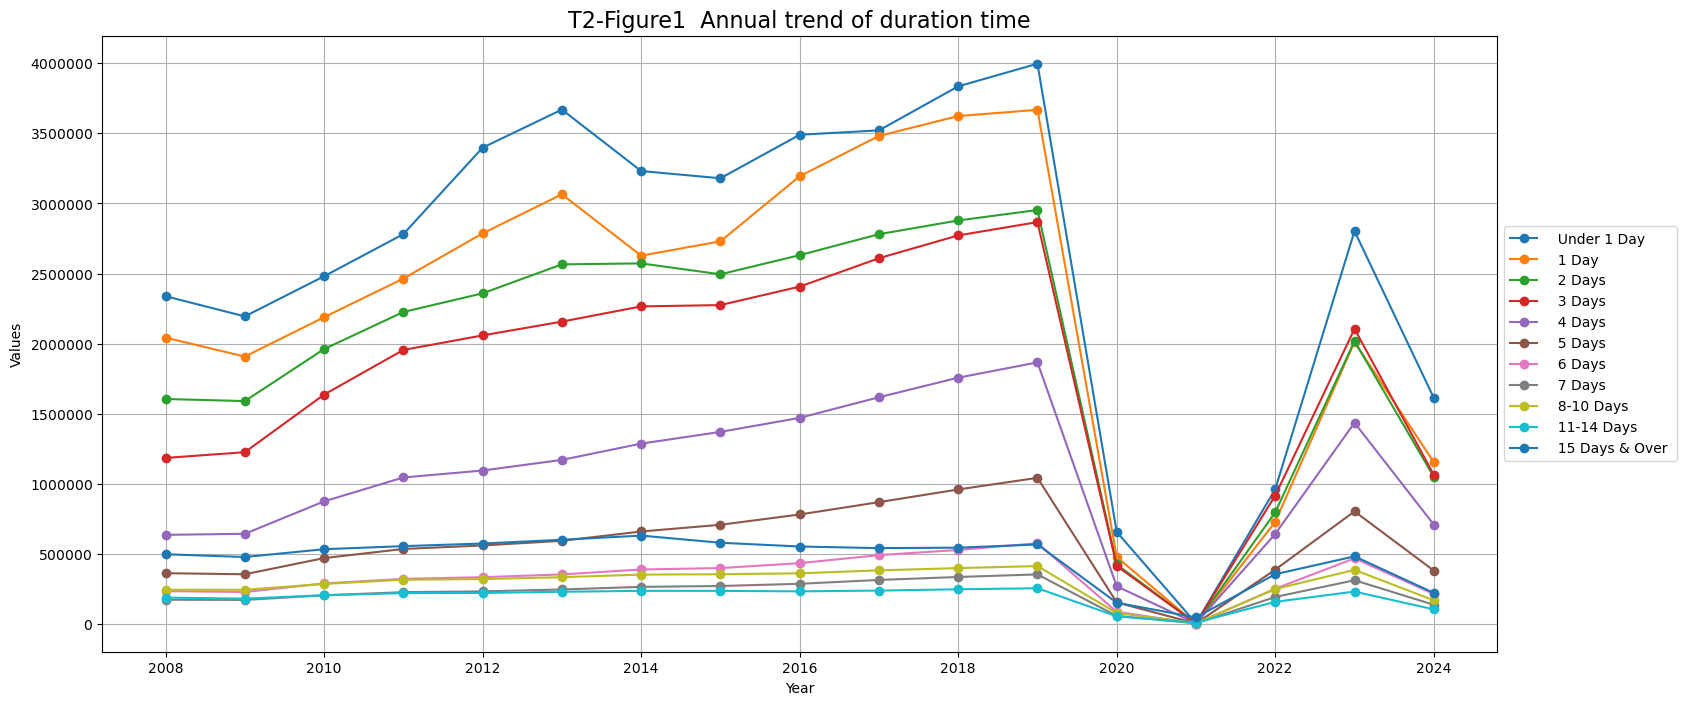

In [53]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

plt.figure(figsize=(18, 8))

for column in result_df.columns[1:12]:
    plt.plot(df2['Year'], result_df[column], marker='o', label=column)

formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title("T2-Figure1  Annual trend of duration time",fontsize=16)
plt.xlabel("Year") 
plt.ylabel("Values")
plt.grid(True)
plt.show()


In [57]:
df3=df.iloc[1:12,0].transpose()
selected_data_2020 = df1.iloc[26:54, 1:12]
selected_data_2020.columns= df3
selected_data_2020 = selected_data_2020.iloc[::-1]

<Figure size 2000x800 with 0 Axes>

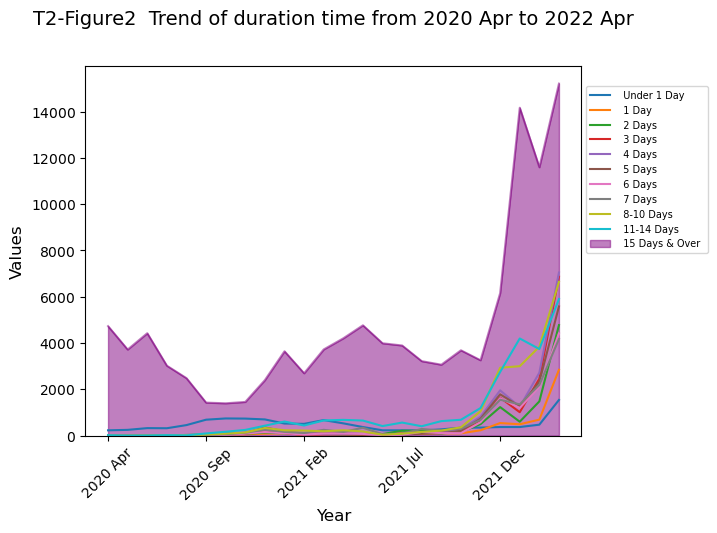

In [59]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

plt.figure(figsize=(20, 8))

ax = selected_data_2020.iloc[3:27].drop('  15 Days & Over ', axis=1).plot(kind='line')

selected_data_2020.iloc[3:27]['  15 Days & Over '].plot(kind='area', color='purple', alpha=0.5, ax=ax)  # 使用ax=ax将面积图画在同一个坐标轴上

formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)

plt.title("T2-Figure2  Trend of duration time from 2020 Apr to 2022 Apr", fontsize=14, pad=30)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.72), prop={'size': 7})
plt.show()


### Finding 2: 
#### Use a stack diagram to visualize the relative proportions of each part in the total
#### Stays of 4 days or less account for the majority of all stays, the average percentage was 82.37%
#### The total number of visitors peaked in July at 1,7916,904, while September had the lowest number of visitors at 14,463,583

<Figure size 1200x800 with 0 Axes>

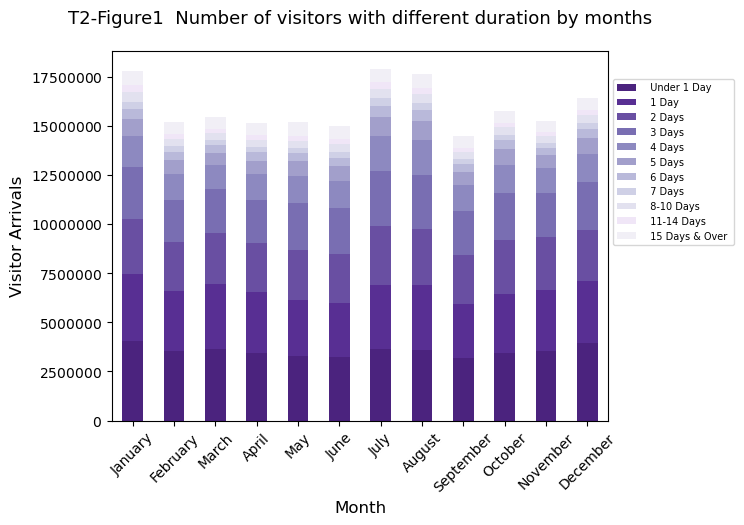

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure(figsize=(12, 8))

data_to_plot = df_by_month_1.set_index(df_months['Month'])

colors = ['#4b237e', '#582f93', '#694fa2', '#796eb2', '#8d89c0', '#a29fcb', '#b9b9da', '#cfd0e6', '#e2e1ef', '#f0e6f7', '#f1eff6']
ax = data_to_plot[data_to_plot.columns[1:12]].plot(kind='bar', stacked=True, color=colors)

plt.title('T2-Figure1  Number of visitors with different duration by months', fontsize=13, pad=20)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Visitor Arrivals', fontsize=12)

formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xticks(rotation=45)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.7), prop={'size': 7})
plt.show()


<Figure size 1200x800 with 0 Axes>

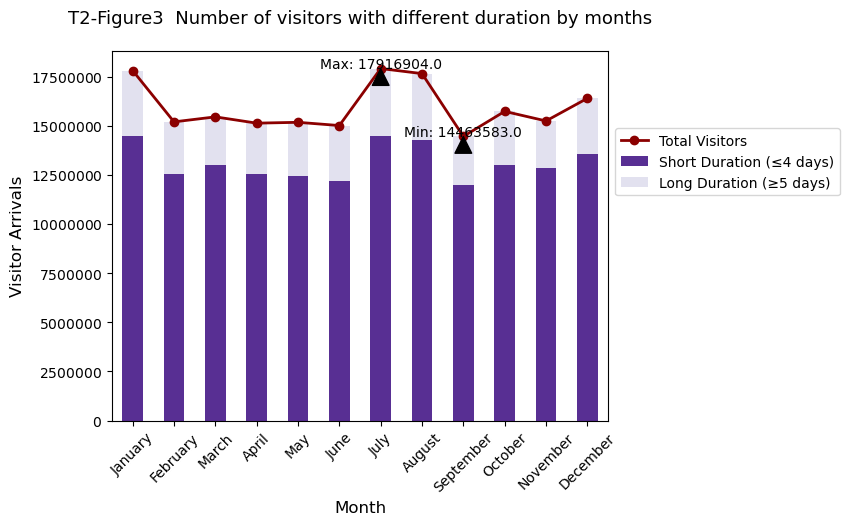

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

data_to_plot = df_by_month_1.set_index(df_months['Month'])

short_duration_columns = data_to_plot.columns[1:6]  
long_duration_columns = data_to_plot.columns[6:12]  

data_to_plot['Short Duration'] = data_to_plot[short_duration_columns].sum(axis=1)
data_to_plot['Long Duration'] = data_to_plot[long_duration_columns].sum(axis=1)

plt.figure(figsize=(12, 8))
colors = ['#582f93', '#e2e1ef'] 
ax = data_to_plot[['Short Duration', 'Long Duration']].plot(kind='bar', stacked=True, color=colors
                                                           )
data_to_plot[data_to_plot.columns[0]].plot(kind='line', color='darkred', marker='o', linewidth=2, ax=ax, label='Total Visitors')

max_value = data_to_plot[data_to_plot.columns[0]].max()
min_value = data_to_plot[data_to_plot.columns[0]].min()
max_month_index = list(data_to_plot.index).index(data_to_plot[data_to_plot.columns[0]].idxmax())
min_month_index = list(data_to_plot.index).index(data_to_plot[data_to_plot.columns[0]].idxmin())

plt.annotate(f'Max: {max_value}', xy=(max_month_index, max_value), xytext=(max_month_index, max_value + 5),
             arrowprops=dict(facecolor='black', shrink=0.05), ha='center')
plt.annotate(f'Min: {min_value}', xy=(min_month_index, min_value), xytext=(min_month_index, min_value - 5),
             arrowprops=dict(facecolor='black', shrink=0.05), ha='center')


plt.title('T2-Figure3  Number of visitors with different duration by months', fontsize=13, pad=20)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Visitor Arrivals', fontsize=12)
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(rotation=45)
plt.legend(['Total Visitors','Short Duration (≤4 days)', 'Long Duration (≥5 days)'],loc='center left', bbox_to_anchor=(1, 0.7), prop={'size': 10})

plt.show()


### Finding 3: 
#### There is a relatively obvious decline in arrivals between day3, day4 and day5
#### The average difference between 3 and 4 days is 972403

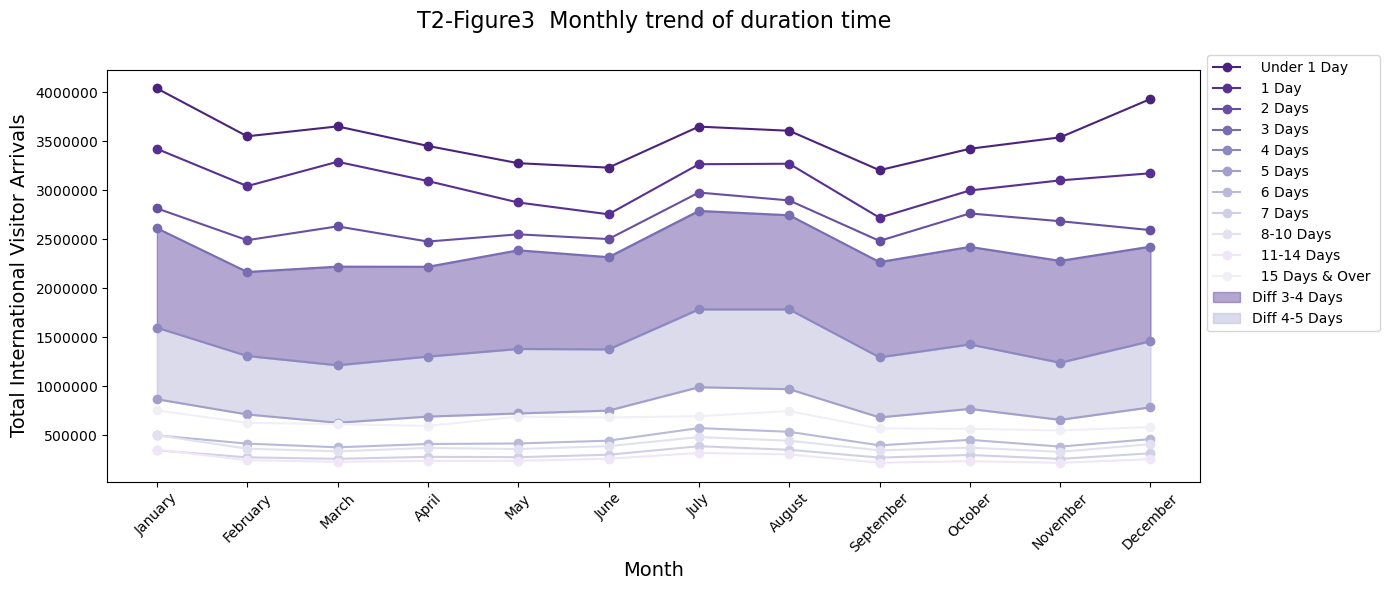

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure(figsize=(14, 6))

color_list = ['#4b237e', '#582f93', '#694fa2', '#796eb2', '#8d89c0', '#a29fcb', '#b9b9da', '#cfd0e6', '#e2e1ef', '#f0e6f7', '#f1eff6']

for idx, column in enumerate(df_by_month_1.columns[1:12]):
    plt.plot(df_months['Month'], df_by_month_1[column], marker='o', label=column, color=color_list[idx % len(color_list)])

df_by_month_1['3-4 Days GAP'] = df_by_month_1['  4 Days '] - df_by_month_1['  3 Days ']
df_by_month_1['4-5 Days GAP'] = df_by_month_1['  5 Days '] - df_by_month_1['  4 Days ']

plt.fill_between(df_months['Month'], df_by_month_1['  3 Days '], df_by_month_1['  4 Days '], color='#694fa2', alpha=0.5, label='Diff 3-4 Days')
plt.fill_between(df_months['Month'], df_by_month_1['  4 Days '], df_by_month_1['  5 Days '], color= '#b9b9da', alpha=0.5, label='Diff 4-5 Days')

plt.title('T2-Figure3  Monthly trend of duration time', fontsize=16, pad=30) 
plt.xlabel('Month', fontsize=14) 
plt.ylabel('Total International Visitor Arrivals', fontsize=14) 

formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.7))
plt.tight_layout()
plt.show()


<Figure size 1800x800 with 0 Axes>

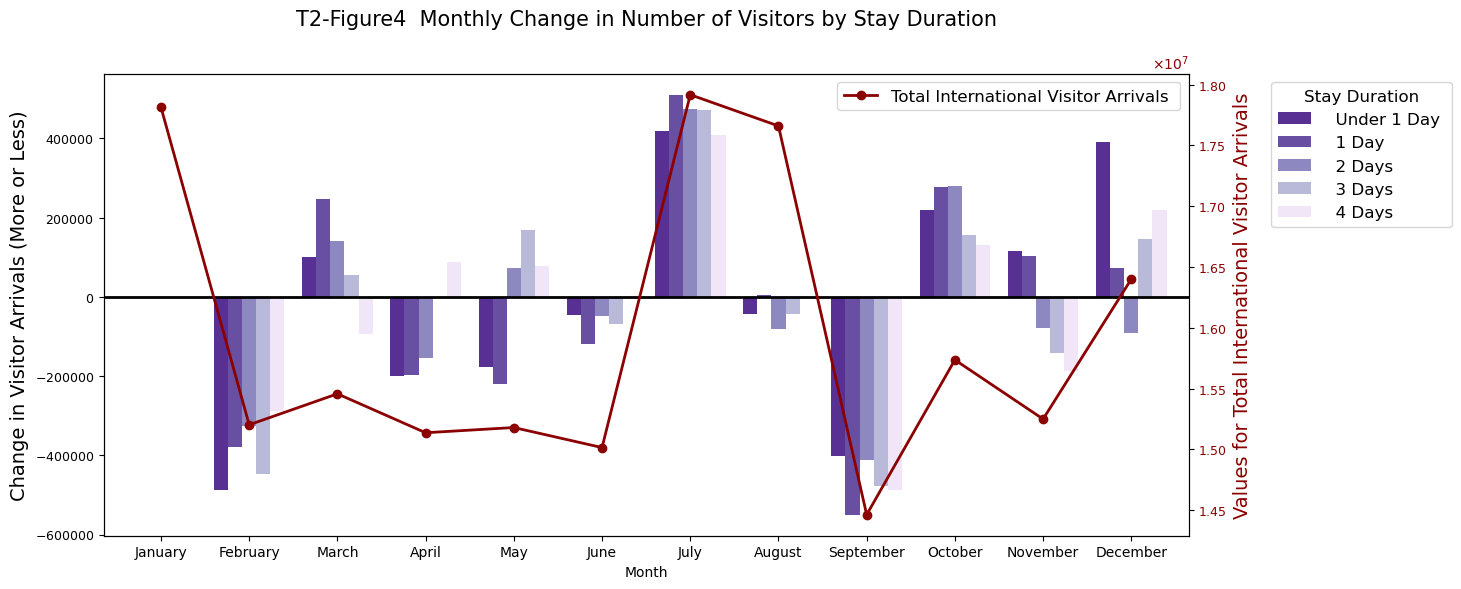

In [24]:
plt.figure(figsize=(18, 8))

df_by_month_1.set_index(df_months['Month'], inplace=True)

month_changes = df_by_month_1[df_by_month_1.columns[1:6]].diff()

color_list = ['#582f93', '#694fa2', '#8d89c0', '#b9b9da', '#f0e6f7']

ax = month_changes.plot(kind='bar', figsize=(14, 6), width=0.8, color=color_list)


ax.set_ylabel('Change in Visitor Arrivals (More or Less)', fontsize=14)
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.yaxis.set_tick_params(labelsize=9)


ax2 = ax.twinx()
ax2.plot(df_by_month_1.index, df_by_month_1[df_by_month_1.columns[0]], color='darkred', marker='o', linewidth=2, label=df_by_month_1.columns[0])
ax2.set_ylabel('Values for Total International Visitor Arrivals', fontsize=14, color='darkred')
ax2.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax2.yaxis.set_tick_params(labelcolor='darkred', labelsize=9)

plt.title('T2-Figure4  Monthly Change in Number of Visitors by Stay Duration', fontsize=15, pad=35)
plt.xlabel('Month', fontsize=15)

ax.legend(title="Stay Duration", loc='upper right', fontsize=12, title_fontsize=12, bbox_to_anchor=(1.25, 1))
ax2.legend(loc='upper right', fontsize=12)

ax.axhline(0, color='black', linewidth=2) 
ax.xaxis.set_tick_params(rotation=0)

plt.show()

### Finding 4：
#### In the range of 1-7 days, the longer the stay, the fewer the corresponding number of tourists. 
#### The heat map is chosen because it can intuitively show the multidimensional relationship between duration, number of people and time

<Figure size 1296x576 with 0 Axes>

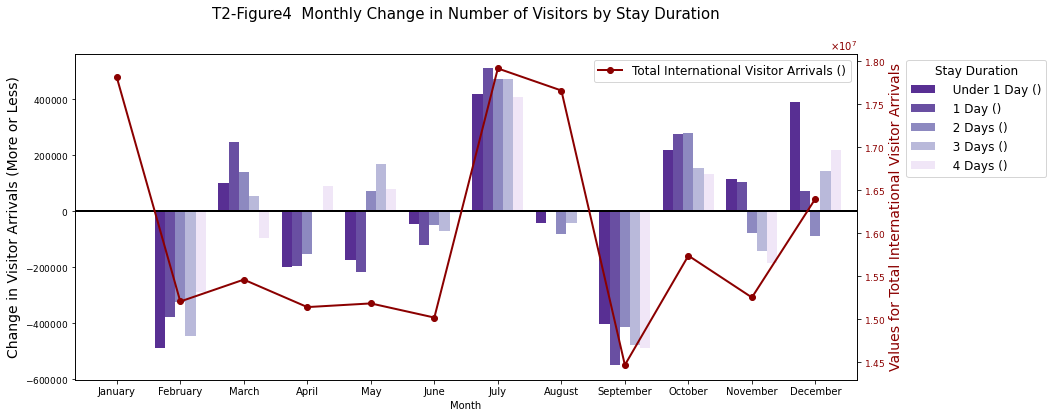

In [149]:
plt.figure(figsize=(18, 8))

df_by_month_1.set_index(df_months['Month'], inplace=True)

month_changes = df_by_month_1[df_by_month_1.columns[1:6]].diff()

# 颜色列表
color_list = ['#582f93', '#694fa2', '#8d89c0', '#b9b9da', '#f0e6f7']

# 绘制柱状图并指定颜色
ax = month_changes.plot(kind='bar', figsize=(14, 6), width=0.8, color=color_list)

# y1
ax.set_ylabel('Change in Visitor Arrivals (More or Less)', fontsize=14)
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.yaxis.set_tick_params(labelsize=9)

# y2
ax2 = ax.twinx()
ax2.plot(df_by_month_1.index, df_by_month_1[df_by_month_1.columns[0]], color='darkred', marker='o', linewidth=2, label=df_by_month_1.columns[0])
ax2.set_ylabel('Values for Total International Visitor Arrivals', fontsize=14, color='darkred')
ax2.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax2.yaxis.set_tick_params(labelcolor='darkred', labelsize=9)

plt.title('T2-Figure4  Monthly Change in Number of Visitors by Stay Duration', fontsize=15, pad=35)
plt.xlabel('Month', fontsize=15)

ax.legend(title="Stay Duration", loc='upper right', fontsize=12, title_fontsize=12, bbox_to_anchor=(1.25, 1))
ax2.legend(loc='upper right', fontsize=12)

ax.axhline(0, color='black', linewidth=2) 
ax.xaxis.set_tick_params(rotation=0)

plt.show()

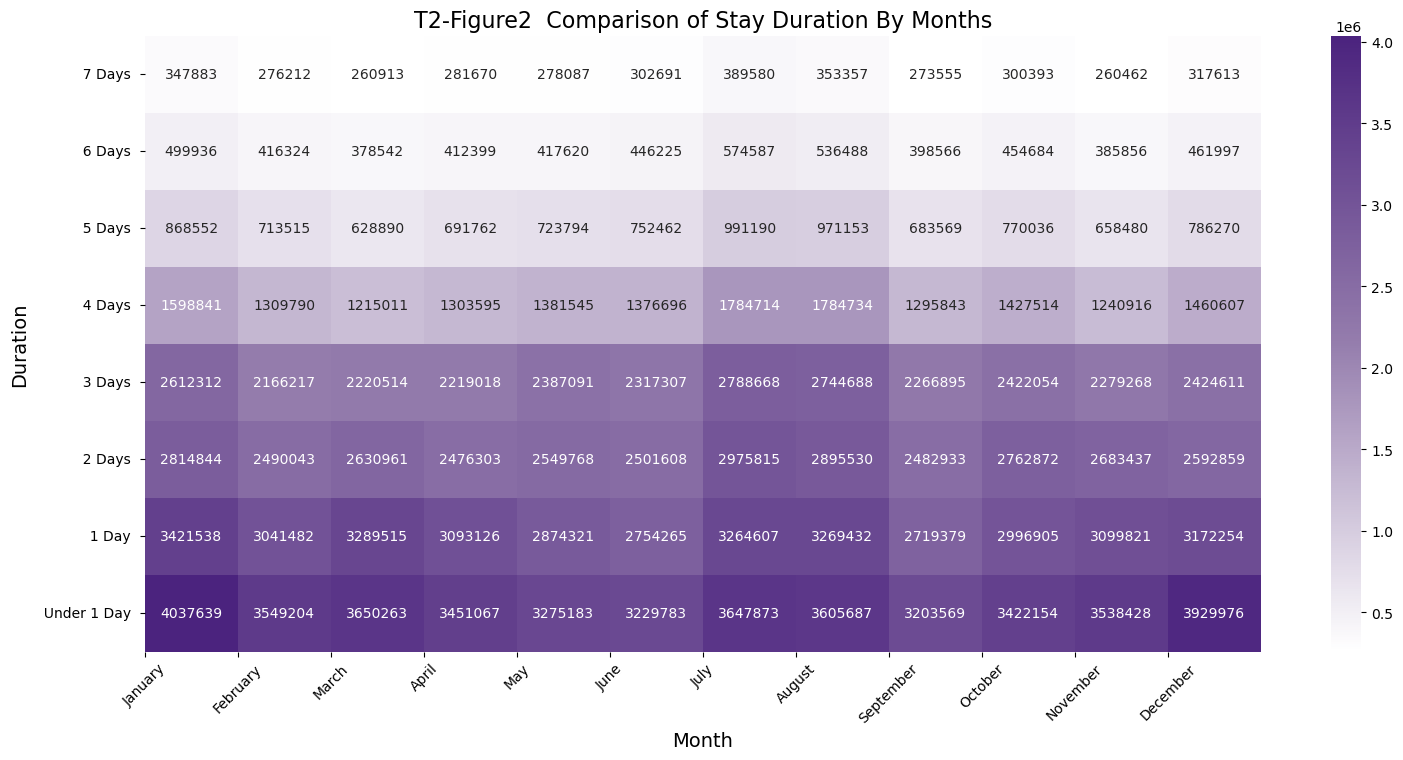

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as ticker

colors = ["#ffffff", "#957DAD", "#4b237e"]
custom_purple = LinearSegmentedColormap.from_list("custom_purple", colors, N=256)

months = ['January', 'February', 'March', 'April', 'May', 'June',
          'July', 'August', 'September', 'October', 'November', 'December']

df_by_month_1 = df_by_month_1.set_index(df_months['Month'])

plt.figure(figsize=(18, 8))

heatmap_data = df_by_month_1[df_by_month_1.columns[1:9]].T.iloc[::-1]

sns.heatmap(heatmap_data, cmap=custom_purple, annot=True, fmt=".0f")

plt.title('T2-Figure2  Comparison of Stay Duration By Months', fontsize=16)
plt.xlabel('Month', fontsize=14) 
plt.ylabel('Duration', fontsize=14)
plt.xticks(np.arange(len(months)), months, rotation=45)


plt.show()


### （E）Group By Seasons

In [150]:
seasons_total=[]
for i in range(0,len(df_by_month_1),3):
    if i+3<= len(df_by_month_1):
        sum_block = df_by_month_1.iloc[i:i+3].sum()
        seasons_total.append(sum_block)
seasons_df=pd.DataFrame(seasons_total)
seasons = ['Q1','Q2','Q3','Q4']
df_seasons= pd.DataFrame(seasons,columns=['Season'])

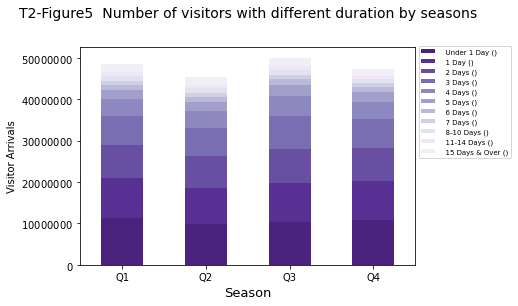

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

data_to_plot = seasons_df.set_index(df_seasons['Season'])

#Divide groups by color
colors = ['#4b237e', '#582f93', '#694fa2', '#796eb2', '#8d89c0', '#a29fcb', '#b9b9da', '#cfd0e6', '#e2e1ef', '#f0e6f7', '#f1eff6']
ax = data_to_plot[data_to_plot.columns[1:12]].plot(kind='bar', stacked=True, color=colors)

plt.title('T2-Figure5  Number of visitors with different duration by seasons', fontsize = 14, pad = 30)
plt.xlabel('Season', fontsize = 13)
plt.ylabel('Visitor Arrivals', fontsize = 10)
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(rotation=0)
plt.legend(loc='center left', bbox_to_anchor=(1,0.75), prop={'size': 7})
plt.show()

<Figure size 1656x504 with 0 Axes>

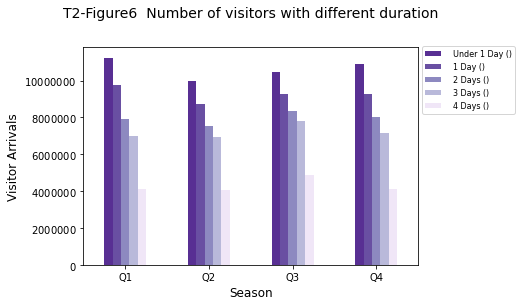

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

data_to_plot = seasons_df.set_index(df_seasons['Season'])
plt.figure(figsize=(23, 7))

color_list = ['#582f93', '#694fa2','#8d89c0', '#b9b9da',  '#f0e6f7']
#Divide groups by color
ax = data_to_plot[data_to_plot.columns[1:6]].plot(kind='bar', stacked=False, color = color_list)

plt.title('T2-Figure6  Number of visitors with different duration', fontsize = 14, pad = 30)
plt.xlabel('Season', fontsize = 12)
plt.ylabel('Visitor Arrivals', fontsize = 12)
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(rotation=0)
plt.legend(loc='center left', bbox_to_anchor=(1,0.85), prop={'size': 8})
plt.show()